<a href="https://colab.research.google.com/github/SubhashGovindharaj/Petrol-Consumption/blob/main/petrol_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('student_scores.csv')
df #Hours - feature , Score - Target

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#**Petrol consumption - Linear Regression**

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df = pd.read_csv('/content/petrol_consumption.csv')

In [ ]:
df   #understand the problem statement

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [ ]:
#SL
#Petrol consumption - target
#Petrol_tax	Average_income	Paved_Highways	Population_Driver_licence(%) - feature
#target variable cont - Regression problem - Linear Regression.


In [ ]:
df.shape #checking the shape

(48, 5)

## Data cleaning

In [ ]:
#checking whether data has any missing value - No
#Checking whether any duplicates - No
#Checking whether any outliers? - Yes - treated
#checking whether the data is unstrucutred - No
#Checking whtethe the data is in incorrected type. - yes.


In [ ]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
df =df.drop_duplicates()

In [ ]:
df.shape

(48, 5)

In [ ]:
feature_columns =list(df.columns[:4]) #Taking all columns in a variable.
feature_columns

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [ ]:
#detecting outliers and treating outliers

for feature in feature_columns:
  print(f"feature - {feature}")
  iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  upperthreshold =df[feature].quantile(0.75) + 1.5*(iqr)
  Lowerthreshold = df[feature].quantile(0.25) - 1.5*(iqr)
  print(f"Upperthreshold = {upperthreshold} and Lowersthershold = {Lowerthreshold}")


  df[feature] = df[feature].clip(Lowerthreshold,upperthreshold) #Clipping max and min to upperthrehold and Lowerthreshold
  print(df[feature].describe())

feature - Petrol_tax
Upperthreshold = 9.8125 and Lowersthershold = 5.3125
count    48.000000
mean      7.670937
std       0.923415
min       5.312500
25%       7.000000
50%       7.500000
75%       8.125000
max       9.812500
Name: Petrol_tax, dtype: float64
feature - Average_income
Upperthreshold = 5838.375 and Lowersthershold = 2479.375
count      48.000000
mean     4241.833333
std       573.623768
min      3063.000000
25%      3739.000000
50%      4298.000000
75%      4578.750000
max      5342.000000
Name: Average_income, dtype: float64
feature - Paved_Highways
Upperthreshold = 13224.625 and Lowersthershold = -2958.375
count       48.000000
mean      5450.442708
std       3149.104278
min        431.000000
25%       3110.250000
50%       4735.500000
75%       7156.000000
max      13224.625000
Name: Paved_Highways, dtype: float64
feature - Population_Driver_licence(%)
Upperthreshold = 0.6934999999999998 and Lowersthershold = 0.4315000000000002
count    48.000000
mean      0.569698
std

In [ ]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                  float64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

## **EDA**

### **Petrol_tax**

<Axes: xlabel='Petrol_tax', ylabel='Petrol_Consumption'>

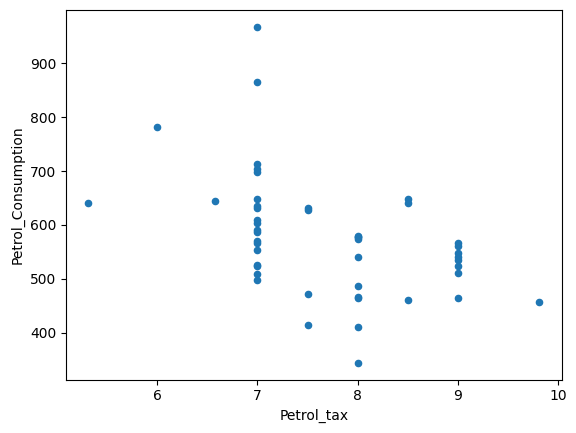

In [ ]:
df.plot.scatter(x='Petrol_tax',y='Petrol_Consumption')

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.806394
Petrol_Consumption,-0.806394,1.000000


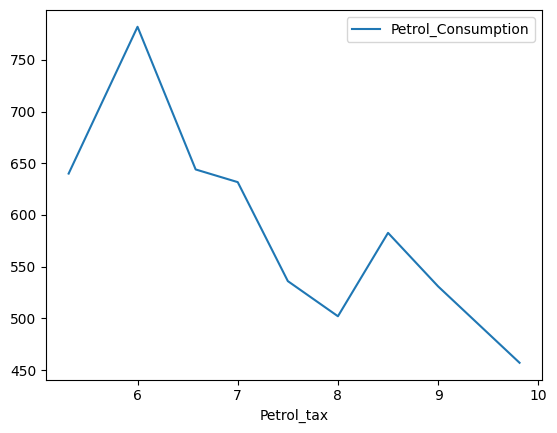

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().reset_index().plot.line(x='Petrol_tax',y='Petrol_Consumption')
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().reset_index().corr()

In [ ]:
#Is there any relationship between Petrol_tax and petrol_consumption? - yes


#is there any linear relationship in data ? - yes

#Can we consider it for Linear relationship? - yes.

#Any transformation needed? - No




### **Average Income**

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976.0,0.525,541
1,9.0,4092,1250.0,0.572,524
2,9.0,3865,1586.0,0.580,561
3,7.5,4870,2351.0,0.529,414
4,8.0,4399,431.0,0.544,410


<Axes: xlabel='Average_income', ylabel='Petrol_Consumption'>

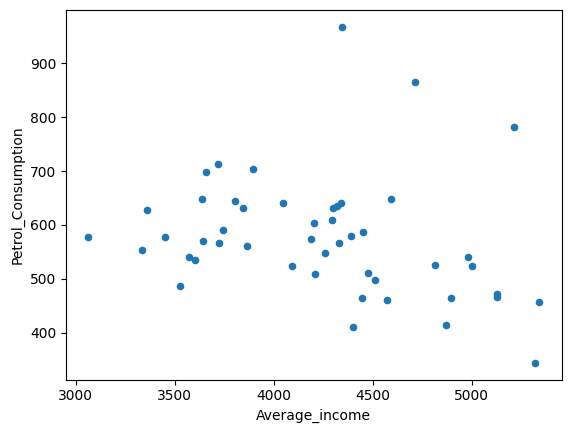

In [ ]:
df.plot.scatter('Average_income','Petrol_Consumption')

In [ ]:
#Is there any relationship in data - yes
#is there any linear relationship in data -  Weak linear realtionship - yes
#Can we consider Linear relationship - yes
df[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


### **Paved_highways**

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976.0,0.525,541
1,9.0,4092,1250.0,0.572,524
2,9.0,3865,1586.0,0.580,561
3,7.5,4870,2351.0,0.529,414
4,8.0,4399,431.0,0.544,410


<Axes: xlabel='Paved_Highways', ylabel='Petrol_Consumption'>

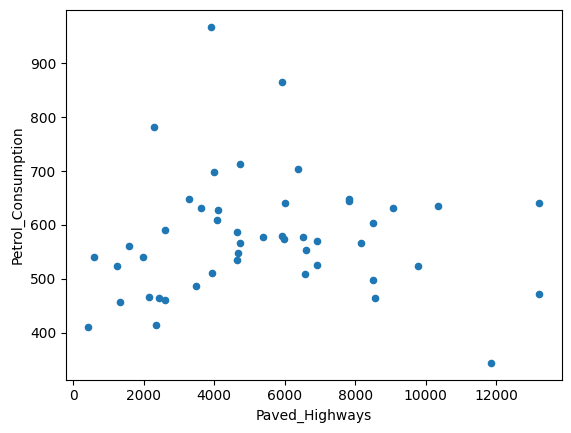

In [ ]:
df.plot.scatter('Paved_Highways','Petrol_Consumption')

In [ ]:
df[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009852
Petrol_Consumption,0.009852,1.000000


In [ ]:
#is there any relationship between ftr and target - yes
#is there anty Linear relationship in data? - NO
#We going to tranform the data

,transformed,Petrol_Consumption
transformed,1.000000,-0.090403
Petrol_Consumption,-0.090403,1.000000


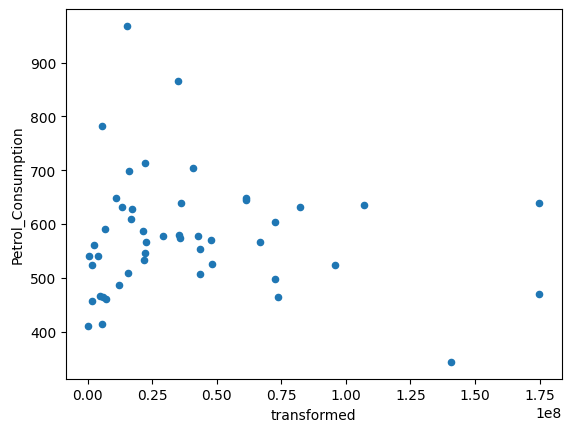

In [ ]:
#ft2
df['transformed'] = (df['Paved_Highways'] ** 2)
df.plot.scatter('transformed','Petrol_Consumption')
df[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,-0.134562
Petrol_Consumption,-0.134562,1.000000


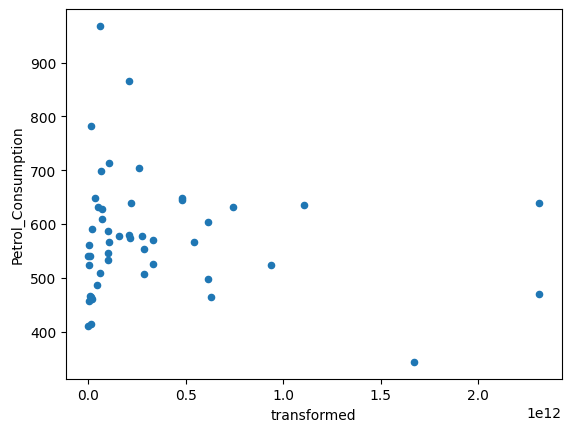

In [ ]:
#ft3

df['transformed'] = (df['Paved_Highways'] ** 3)
df.plot.scatter('transformed','Petrol_Consumption')
df[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.165334
Petrol_Consumption,0.165334,1.000000


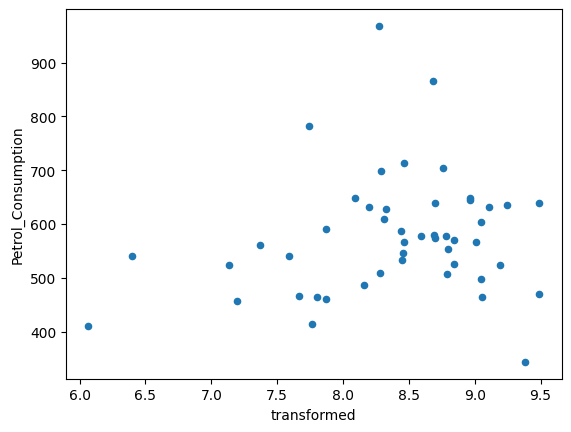

In [ ]:
#Log(ft)

df['transformed'] = (np.log(df['Paved_Highways']))
df.plot.scatter('transformed','Petrol_Consumption')
df[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


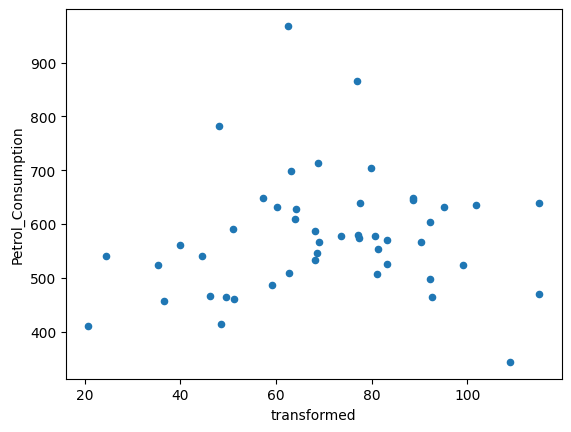

In [ ]:
#Sqrt(ft)
df['transformed'] = (np.sqrt(df['Paved_Highways']))
df.plot.scatter('transformed','Petrol_Consumption')
df[['transformed','Petrol_Consumption']].corr()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


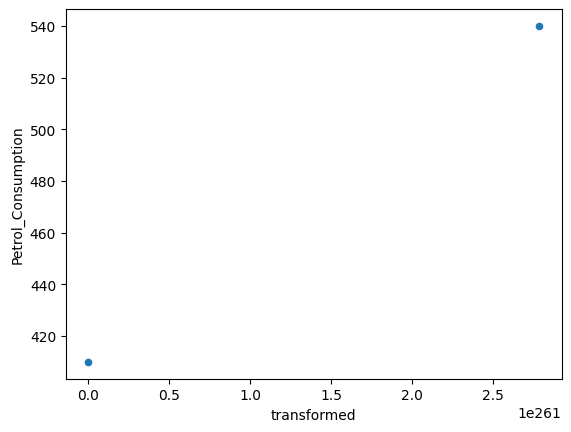

In [ ]:
#exp(ft)

df['transformed'] = (np.exp(df['Paved_Highways']))
df.plot.scatter('transformed','Petrol_Consumption')
df[['transformed','Petrol_Consumption']].corr()


In [ ]:
#No linear relationship - Delete the Paved_highways

In [ ]:
# no transformations gave a linear relationship - Delete the paved_highways
del df['transformed']
del df['Paved_Highways']

### **Population_Driver_licence(%)**

In [ ]:
df.head()

,Petrol_tax,Average_income,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,0.525,541
1,9.0,4092,0.572,524
2,9.0,3865,0.580,561
3,7.5,4870,0.529,414
4,8.0,4399,0.544,410


<Axes: xlabel='Population_Driver_licence(%)', ylabel='Petrol_Consumption'>

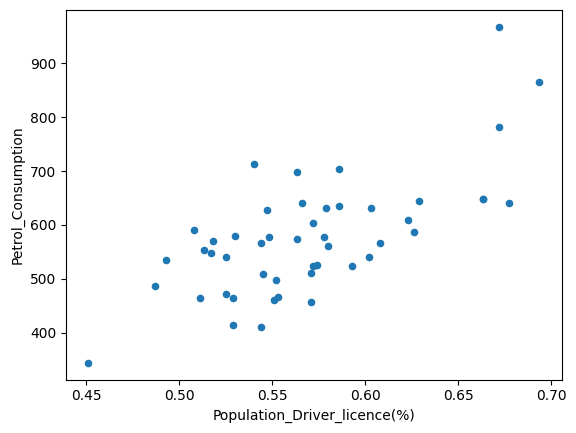

In [ ]:
df.plot.scatter('Population_Driver_licence(%)','Petrol_Consumption')

In [ ]:
#Is there any relationship berween ft and target- yes

#Is there relationship in data?
df[['Population_Driver_licence(%)','Petrol_Consumption']].corr()



,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.689301
Petrol_Consumption,0.689301,1.000000


In [ ]:
df

,Petrol_tax,Average_income,Population_Driver_licence(%),Petrol_Consumption
0,9.0000,3571,0.5250,541
1,9.0000,4092,0.5720,524
2,9.0000,3865,0.5800,561
3,7.5000,4870,0.5290,414
4,8.0000,4399,0.5440,410
5,9.8125,5342,0.5710,457
6,8.0000,5319,0.4510,344
7,8.0000,5126,0.5530,467
8,8.0000,4447,0.5290,464
9,7.0000,4512,0.5520,498


### **Encoding**

In [ ]:
#No encoding is required, Since there is no categorical data.

### **Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(48, 4)

In [ ]:
X = df.loc[:,list(df.columns[:3])].values #row criteria, column criteria , values - will change tonumpy arrays
y = df.loc[:,['Petrol_Consumption']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 376)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 3), (12, 3), (36, 1), (12, 1))

### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # this will find the mean and std
X_train = scaler.transform(X_train) # this will convert the training data to the transformed training data
X_test = scaler.transform(X_test)# this will convert the test data to the transformed test data

## **Model Jar**

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression() #creating an object.

model.fit(X_train,y_train) #fit - trainning the data. #all magic will happen - model fit, loss function, gradient descent

model.predict(X_test) #model [predict]

model.coef_,model.intercept_

#Petrol_consumption = -30 *Scaled petrol_tax - 37 * Scaled avg_income + 84 * Scaled_pop_driver license + 577

(array([[-30.50017927, -37.27454282,  84.13312604]]), array([577.41666667]))

In [ ]:
model.score(X_test,y_test)

0.3554507576322845